# Thermal Balance and Convergence

As described under [Evaluation](../output/evaluation.rst) and in the release paper, basic information about convergence is printed out to the user. This information can also be accessed through the same files used to plot wind properties, and inspected on a cell by cell basis. this notebook describes how to assess convergence in a bit more detail and look at the heating and cooling processes in the wind. As with [Plotting Wind Properties](plot_wind), we will assume we have run the ```cv_test``` model and run ```windsave2table``` on this model to produce the basic output files. We then start by setting up the basic ```Wind``` class.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysi 
from pysi.sim import model
root = "cv_standard"
directory = "cv_test/"

## Basic convergence statistics 
A function ```model.model_convergence``` using the ```.diag.``` file to get basic convergence information, either total convergence or on a cycle by cycle basis. 

In [2]:
conv = model.model_convergence(root, fp=directory)
print (conv)

0.803


In [3]:
from pysi.sim import model
conv = model.model_convergence(root, fp=directory, return_per_cycle=True)
print (conv)

[0.139, 0.015, 0.066, 0.277, 0.467, 0.46, 0.54, 0.599, 0.62, 0.628, 0.657, 0.562, 0.657, 0.708, 0.81, 0.81, 0.81, 0.73, 0.62, 0.803]


We can also plot this trivially, or using an inbuilt function as follows: 

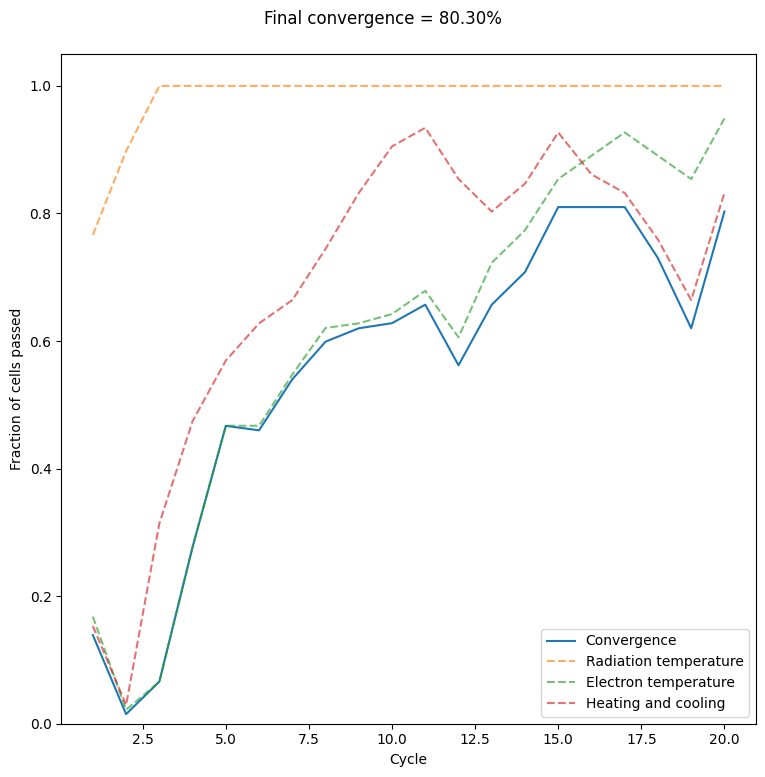

In [4]:
_ = model.plot_model_convergence(root, fp=directory, display=True)

## More detailed convergence
We can investigate the final convergence in more detail using the ```Wind``` class, which contains information on a cell-by-cell basis. Models with ```converge == 0``` are converged.

Version: UNKNOWN


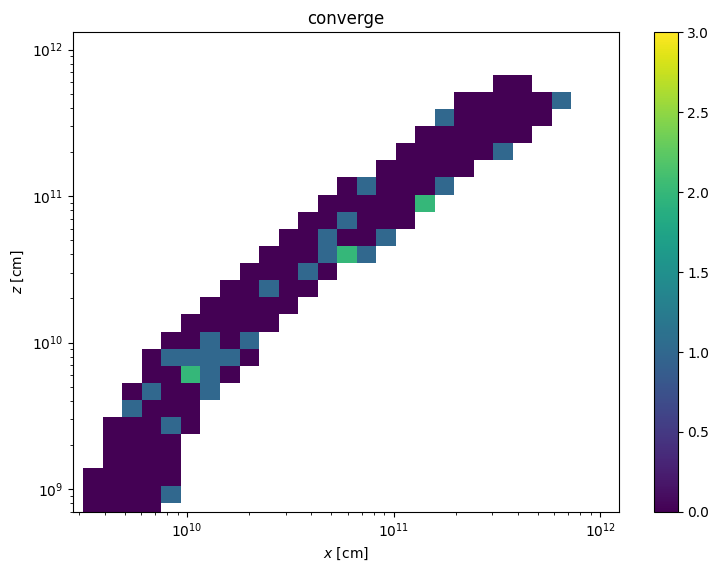

In [11]:
from pysi.wind import Wind
wind = Wind(root = root, directory = directory)
fig, ax = wind.plot_parameter("converge", vmin=0, vmax=3, log_p = False)

Sometimes it's useful to see how the convergence depends on temperature and photon number, which we do using the wind class directly. In this case it's not particularly useful, because the model just needs to run for a bit longer with a few more photons, but in some cases it shows clearly where the trouble is. 

[]

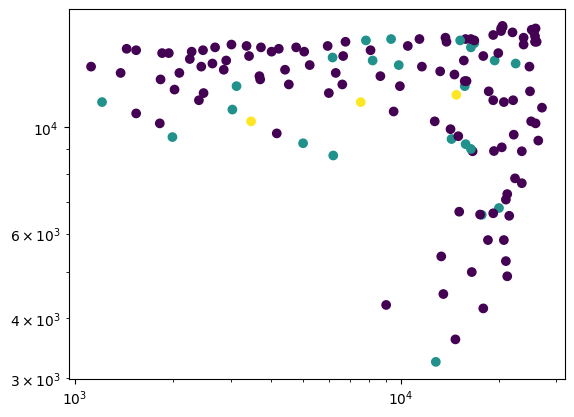

In [12]:
plt.scatter(wind["t_e"], wind["ntot"], c=wind["converge"])
plt.loglog()

## Showing errors
Finally we can use the ```model_errors``` function to print out the error summary. 

In [14]:
_ = model.model_errors(root=root, directory=directory, print_errors=True)

Total errors reported from 1 of 1 processes for cv_test/cv_standard, which exited successfully:
       7 -- getatomic_data: line input f odd (may be OK if Macro): %s
       2 -- get_atomicdata: (Case default) Could not interpret line %d in file %s: %s %d
       1 -- Ignored %d inner shell cross sections because no matching yields
       1 -- get_wind_params: zdom[ndom].rmax = 0 for wind type %d
       1 -- zero_find: function not bracketed x_lo %e -> %e, x_hi %e -> %e
       1 -- roche_width : zero_find failure x=%6.2e rho %.2e phi(l2) %.2e
       1 -- wind2d: Cell %3d (%2d,%2d) in domain %d has %d corners in wind, but zero volume
       1 -- check_grid: velocity changes by >1,000 km/s in %i cells
       1 -- check_grid: optical depth may be high in %i
       1 -- check_grid: some cells have large changes. Consider modifying zlog_scale or grid dims
